In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0-rc1'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py
df=h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5","r")

In [5]:
df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [6]:
print('Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)') 

Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)


In [0]:
X_test = df['X_test'][:]

In [0]:
X_train = df['X_train'][:]

In [0]:
y_test=df['y_test'][:]

In [0]:
y_train=df['y_train'][:]

In [0]:
X_val = df['X_val'][:]

In [0]:
y_val=df['y_val'][:]

In [0]:
#finding dimension of an image in dataset

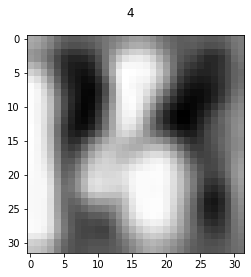

In [14]:
#Lets print the image as well
import matplotlib.pyplot as plt
import numpy as np
img_num = np.random.randint(0,X_test.shape[0])
plt.imshow(X_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

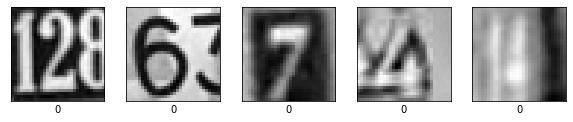

In [15]:
#Verifying if existing labes/classes are correct
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(y_val[y_train[i]])
plt.show()

In [16]:
print('Data fetching and understand the train/val/test splits.')

Data fetching and understand the train/val/test splits.


In [17]:
X_test.shape

(18000, 32, 32)

In [18]:
X_train.shape

(42000, 32, 32)

In [19]:
y_test.shape

(18000,)

In [20]:
y_train.shape

(42000,)

In [21]:
X_val.shape

(60000, 32, 32)

In [22]:
y_val.shape

(60000,)

In [0]:
#to categorize
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [24]:
print('Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) ')

Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) 


In [0]:
## By Adam optimizer
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D 
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#adding first hidden layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Flatten())

#adding second hidden layer
model1.add(tf.keras.layers.Dense(100, activation='relu'))

model1.add(tf.keras.layers.Dense(128, activation='relu'))


#Output layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03, decay=0.001)

model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [146]:
#Train the model
model1.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 220us/sample - loss: 1.3485 - accuracy: 0.5530 - val_loss: 0.9229 - val_accuracy: 0.7102
Epoch 2/10
42000/42000 [==============================] - 9s 208us/sample - loss: 0.9720 - accuracy: 0.6931 - val_loss: 0.7699 - val_accuracy: 0.7634
Epoch 3/10
42000/42000 [==============================] - 9s 205us/sample - loss: 0.8497 - accuracy: 0.7314 - val_loss: 0.6835 - val_accuracy: 0.7898
Epoch 4/10
42000/42000 [==============================] - 9s 207us/sample - loss: 0.7890 - accuracy: 0.7509 - val_loss: 0.6452 - val_accuracy: 0.8014
Epoch 5/10
42000/42000 [==============================] - 9s 207us/sample - loss: 0.7236 - accuracy: 0.7716 - val_loss: 0.5869 - val_accuracy: 0.8200
Epoch 6/10
42000/42000 [==============================] - 9s 207us/sample - loss: 0.6890 - accuracy: 0.7822 - val_loss: 0.5740 - val_accuracy: 0.8258
Epoch 7/10
42000/42000 [==========================

In [0]:
## By adagrad optimizer
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D 
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#adding first hidden layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))

#adding second hidden layer
model2.add(tf.keras.layers.Dense(100, activation='relu'))

model2.add(tf.keras.layers.Dense(128, activation='relu'))


#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adagrad', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [185]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 243,414
Trainable params: 241,366
Non-trainable params: 2,048
______________________________________________

In [186]:
#Train the model
model2.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 211us/sample - loss: 1.7980 - accuracy: 0.4156 - val_loss: 1.4185 - val_accuracy: 0.5876
Epoch 2/10
42000/42000 [==============================] - 8s 202us/sample - loss: 1.3643 - accuracy: 0.5869 - val_loss: 1.1943 - val_accuracy: 0.6582
Epoch 3/10
42000/42000 [==============================] - 9s 208us/sample - loss: 1.2278 - accuracy: 0.6300 - val_loss: 1.0998 - val_accuracy: 0.6841
Epoch 4/10
42000/42000 [==============================] - 9s 203us/sample - loss: 1.1548 - accuracy: 0.6531 - val_loss: 1.0399 - val_accuracy: 0.6997
Epoch 5/10
42000/42000 [==============================] - 9s 203us/sample - loss: 1.1067 - accuracy: 0.6657 - val_loss: 0.9965 - val_accuracy: 0.7124
Epoch 6/10
42000/42000 [==============================] - 9s 208us/sample - loss: 1.0733 - accuracy: 0.6766 - val_loss: 0.9630 - val_accuracy: 0.7229
Epoch 7/10
42000/42000 [==========================